# Inhibitor Diffusion and Germination - Effect of Spore Density

## Numerical experiments - Week 03/2025

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## Prerequisite libraries

In [1]:
import numpy as np
from importlib import reload
import setup as st
import diffusion as df
import conversions as conv
import plotting as pt

## 1. Functional relationship between spore density and saturation

The previous notebook explored spore densities consistent with experimental setups where density-induced inhibition was observed. While the numerical experiments did not indicate an effect of spore density in a regular grid-like 3D distribution, an open question remains at which densities a local saturation becomes noticeable. To establish a functional relationship between the spore density and the inhibitor concentration at the spore at 4 hours, multiple simulations need to be performed with varying periodic lattice sizes, indicative of different spore grid densities.

The bottom limit of the density range is set at $3\times10^4$ spores/mL - an value just below the previously observed densities. The upper extreme is set at a configuration where the spore only has a single layer of free lattice sites around it. This corresponds to a lattice edge length of $L=3\times 5\mu\text{m}=15\mu\text{m}$ and a volume $V=3.375\times 10^{-9}$ mL, corresponding to a spore density of approximately $2.96\times 10^{8}$ spores/mL. This is rounded to $3\times 10^{8}$ spores/mL.

[3.00000000e+04 9.48683298e+04 3.00000000e+05 9.48683298e+05
 3.00000000e+06 9.48683298e+06 3.00000000e+07 9.48683298e+07
 3.00000000e+08]
Populating uniform 3D spore grid
Conversion: 3.00000000000000E-8 micrometers^-3
Effective density: 2.999999892949745e-08 spores/micrometer^3
Populating volume of 262144000 micrometers^3 with 7.86431971937418 spores, 1 spores per dimension
Spore spacing: 640.0 micrometers
Conversion: 9.48683298050514E-8 micrometers^-3
Effective density: 9.48683265278305e-08 spores/micrometer^3
Populating volume of 262144000 micrometers^3 with 24.8691625893116 spores, 2 spores per dimension
Spore spacing: 320.0 micrometers
Conversion: 3.00000000000000E-7 micrometers^-3
Effective density: 3.000000106112566e-07 spores/micrometer^3
Populating volume of 262144000 micrometers^3 with 78.64320278167725 spores, 4 spores per dimension
Spore spacing: 160.0 micrometers
Conversion: 9.48683298050514E-7 micrometers^-3
Effective density: 9.486832937000145e-07 spores/micrometer^3
Pop

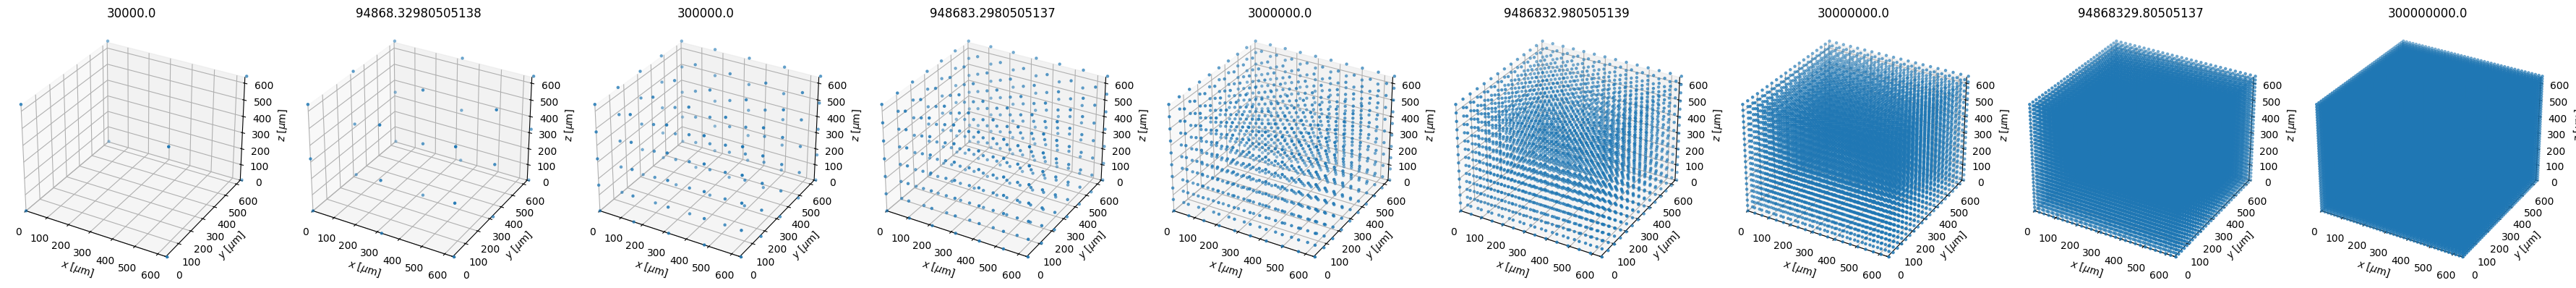

In [2]:
spore_densities = 3 * 10 ** np.arange(4, 8.5, 0.5)
print(spore_densities)

N = 127
dx = 5

# Uniform spore grid
print("Populating uniform 3D spore grid")
spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

pt.plot_spore_positions(np.full(len(spore_coords_all), N), np.full(len(spore_coords_all), N), spore_coords_all, dx,
                        titles=spore_densities)

The diffusion procedure is then run with at all spore densities until $t_{\textrm{max}}=4 \textrm{h}$.

In [3]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# General simulation parameters
t_max = 14400 # seconds
dt = 0.005
dx = 5 # microns
n_save_frames = 100
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Define experiment parameters
global_id = 'ms_250115'
exp_params = []
title_base = 'spores/mL,\nspore spacing: '
for i, density in spore_densities:
    label = str(np.format_float_scientific(np.round(density, 1))) + title_base + f'{round(spore_spacing_all[i])} $\mu$m'
    exp_params.append({'expID': global_id, 'simID': f'D{density}', 'label': label, 'dims': 3,
                       'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': density})

# Run simulations
st.run_diffusion_experiments_multi_spore(exp_params, t_max, dt, dx, n_save_frames, V_spore, c_thresh_factors)

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_3948\2809507785.py:22: SyntaxWarning: invalid escape sequence '\m'
  label = str(np.format_float_scientific(np.round(spore_densities[3], 1))) + title_base + f'{round(spore_spacing_all[3])} $\mu$m'


Conversion: 3.00000000000000E-8 micrometers^-3
D30000.0: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 517
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [2590 2590 2590] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 9.48683298050514E-8 micrometers^-3
D94868.32980505138: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 291
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [1460 1460 1460] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 3.00000000000000E-7 micrometers^-3
D300000.0: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 164
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [825 825 825] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 9.48683298050514E-7 micrometers^-3
D948683.2980505137: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 92
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [465 465 465] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.00000300000000000000 micrometers^-3
D3000000.0: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 52
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [265 265 265] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.00000948683298050514 micrometers^-3
D9486832.980505139: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 30
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [155 155 155] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.0000300000000000000 micrometers^-3
D30000000.0: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 17
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [90 90 90] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 27 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 45 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.0000948683298050514 micrometers^-3
D94868329.80505137: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 10
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [55 55 55] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 8 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 0.000300000000000000 micrometers^-3
D300000000.0: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 6
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [35 35 35] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 2 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [9]:
reload(conv)
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:287: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel('Spore density [$1/\mu m^3$]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:297: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel('Spore distance [$\mu m$]')


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

Plotting simulation D30000.0: 3e+04spores/mL,
spore spacing: 2585 $\mu$m
Plotting simulation D94868.32980505138: 9.486833e+04spores/mL,
spore spacing: 1455 $\mu$m
Plotting simulation D300000.0: 3+05spores/mL,
spore spacing: 820 $\mu$m


d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:287: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel('Spore density [$1/\mu m^3$]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:297: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel('Spore distance [$\mu m$]')


MemoryError: Unable to allocate 105. GiB for an array with shape (101, 518, 518, 518) and data type float64

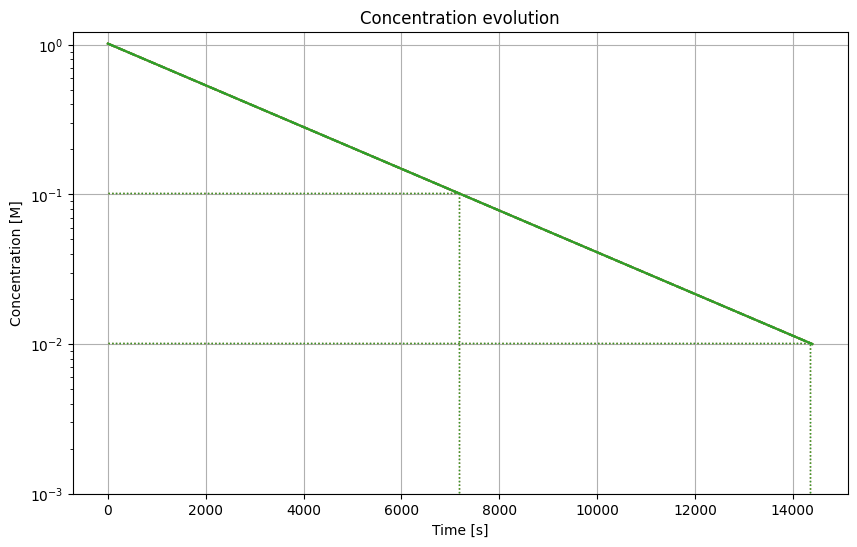

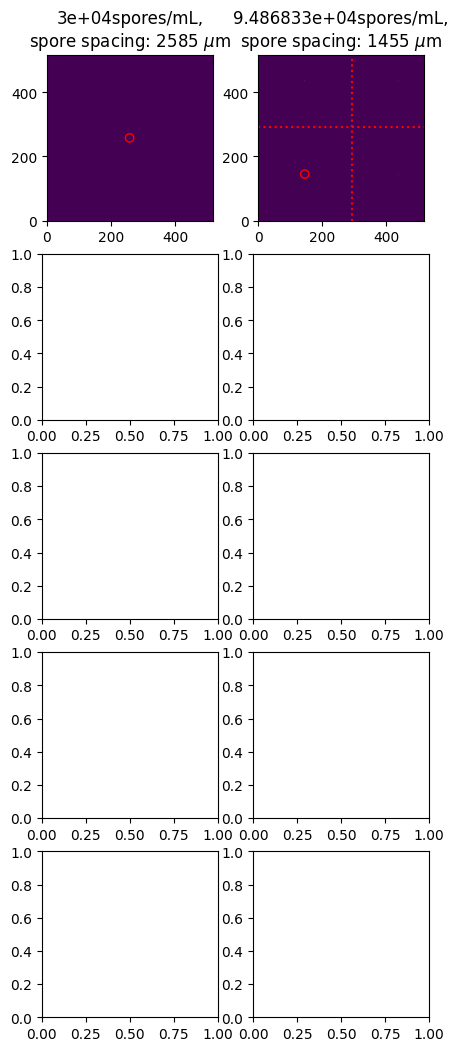

In [8]:
global_id = 'ms_250115'
t_max = 14400
pt.plot_experiment_results(global_id, logy=True, target_thresh=0.01, mark_spore=True)
pt.plot_densities_vs_concentrations_at_time(global_id, t_max, lin_fit=True)

## 3. Diffusion between spores at the bottom of the medium

A heterogeneous densification occurs naturally when spores sink to the bottom of the medium due to gravity. In a typical experimental setup [1] the time until spores sink to the bottom of a well filled with $150 \mu\textrm{L}$ medium (from which a medium depth of 3.9 mm is calculated) is about 1 hours. This is a significant period overlapping with inhibitor release that needs to be accounted for. For the sake of simplicity it is assumed that during the settling process the inhibitor diffuses homogeneously like in the 3D grid scenario, so the simulations of the 2D lattice bottom array start with a concentration equivalent to $c(t=3600\textrm{s})$.

The lattice used in these simulations is periodic along the $x$ and the $y$ dimensions but has a Neumann boundary condition at $z=0$ and $z=h$, which sets the derivative of the concentration normal to the boundary to zero. As before, the lattice size along the first two dimensions is adapted to the input spore density. The spore densities from the first multi-spore experiment (5000, 10000, 20000, and 40000 spores per $150 \mu\text{L}$) are used. The height of the medium is set to $h=3900\mu\textrm{m}$, which equates to $H=780$ lattice sites in the $z$-direction.

In [7]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# Calculate concentration after 1 hour of settling
spore_vol = 125
spore_area = 150
t_settling = 3600
c_1h = df.permeation_time_dependent_analytical(c_cell_wall, 0, t_settling, Ps_fit, spore_area, spore_vol, alpha=1.0)
print(f'Concentration after 1 hour of settling: {c_1h}')

# General simulation parameters
t_max = 10800 # seconds, 3 hours after 1 hour of settling
dt = 0.005
dx = 5 # microns
H = 780
n_save_frames = 1000
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Input spore densities
spore_density_base = 1/3 * 10**5 # spores per mL
density_factors = 2**np.arange(0, 4, 1)
spore_densities = spore_density_base * density_factors

# Define experiment parameters
global_id = 'msb_250115'
exp_params = []
title_base = 'spores/mL,\nspore spacing: '
for i, density in enumerate(spore_densities):
    spore_spacing = st.lattice_size_from_density(conv.inverse_mL_to_micrometers_cubed(density), 5, 780)
    label = str(np.format_float_scientific(np.round(density, 1))) + title_base + f'{round(spore_spacing)} $\mu$m'
    exp_params.append({'expID': global_id, 'simID': f'D{density}', 'label': label, 'dims': 3,
                       'D': None, 'Ps': Ps_fit, 'c0': c_1h, 'spore_density': density})

# Run simulations
st.run_diffusion_experiments_multi_spore_bottom(exp_params, t_max, dt, dx, H, n_save_frames, V_spore, c_thresh_factors)

3114.853672324434
Concentration after 1 hour of settling: 0.32048730675932574
Conversion: 3.33333333333333E-8 micrometers^-3
Conversion: 6.66666666666667E-8 micrometers^-3
Conversion: 1.33333333333333E-7 micrometers^-3
Conversion: 2.66666666666667E-7 micrometers^-3


<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_27780\302661367.py:36: SyntaxWarning: invalid escape sequence '\m'
  label = str(np.format_float_scientific(np.round(density, 1))) + title_base + f'{round(spore_spacing)} $\mu$m'


In [39]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:257: SyntaxWarning: invalid escape sequence '\m'
  if logx:


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

Plotting simulation D33333.33333333333: 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m
Plotting simulation D66666.66666666666: 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m
Plotting simulation D133333.3333333333: 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m
Plotting simulation D266666.6666666666: 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m


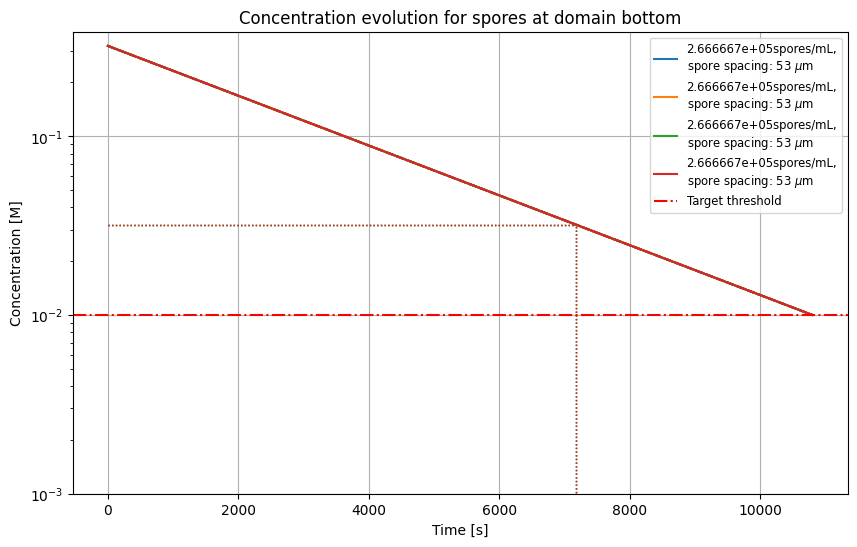

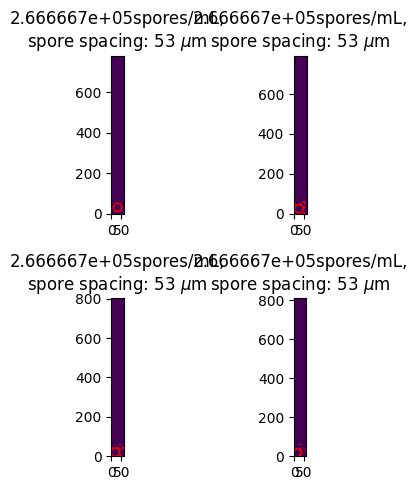

In [80]:
global_id = 'msb_250115'
pt.plot_experiment_results(global_id, logy=True, target_thresh=0.01, mark_spore=True, title='Concentration evolution for spores at domain bottom')

## References

[1] Ijadpanahsaravi, Maryam, L. Basten Snoek, Wieke R. Teertstra and Han A. B. Wösten. “The impact of inter- and intra-species spore density on germination of the food spoilage fungus Aspergillus niger.” International journal of food microbiology 410 (2023): 110495 .